### TASK 0: Import of recquired libraries

In [82]:
# Import the required libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import json
import skimage as ski
from skimage import transform


titel_size = 18
label_size = 16

### TASK 1: Load the data 

useful functions: 
- to load the data: 
  
  ```
  path = 'pathToData'
  v1_info = nib.load(path + 'YourName.nii.gz').header` --> extract header information 
  v1 = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').get_fdata() --> get actual data
  
  ```
  
  `print(v1_info)`

- extract pixel dimensions from v1_info \
  `print(v1_info['pixdim'])`


In [83]:
#Your code here
path = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/'

v1_info = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').header
v1 = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').get_fdata()  # Extract actual data

print(v1_info)
print(v1_info['pixdim'])


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 54
dim             : [  3 224 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     1.3    0.7422 0.7422 0.1    0.     0.     0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'TE=4;Time=102145.000')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x    

### TASK 2 & 3: Visualize

**hint:** the landmark tube is found in the axial slice 50 and in the coronal slice 145

**useful functions** 
- to get the images in the right view you might want to use rotations and transformations
`plt.imshow(ski.transform.rotate(i_coronal.T , angle), cmap='gray', aspect=...)`





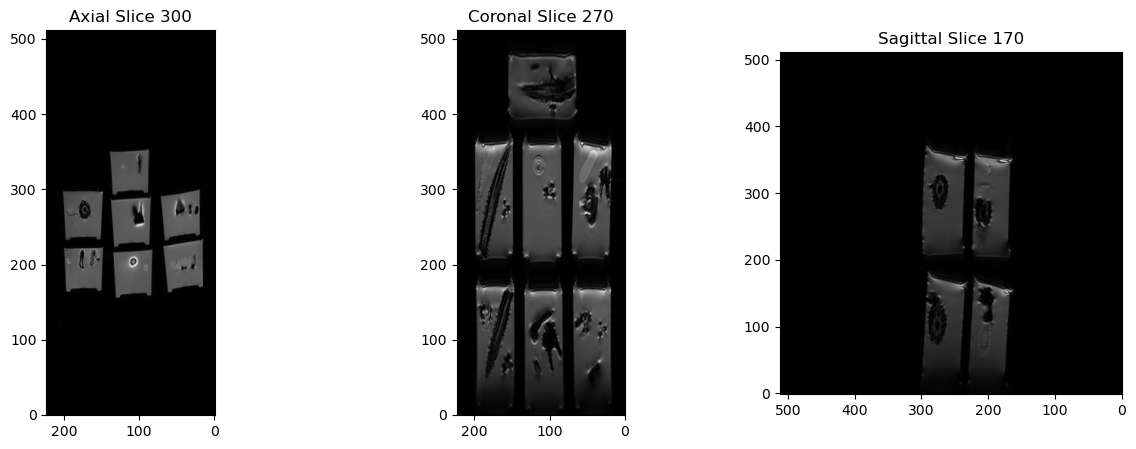

In [84]:
import matplotlib.pyplot as plt
from skimage import transform

# Axial slice (along the Z-axis)
axial_slice = v1[:, :, 300]  # slice 300

# Coronal slice (along the Y-axis)
coronal_slice = v1[:, 270, :]  # slice 270

# Sagittal slice (along the X-axis)
sagittal_slice = v1[170,:, :]  # slice 170



# Visualize all three slices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display Axial slice (flip horizontally to correct orientation)
axes[0].imshow(axial_slice.T, cmap='gray', origin='lower')
axes[0].invert_xaxis()  # Flip to move the small tube to the right
axes[0].set_title('Axial Slice 300')

# Display Coronal slice (flip horizontally for radiological convention)
axes[1].imshow(transform.rotate(coronal_slice.T, angle=0), cmap='gray', origin='lower')
axes[1].invert_xaxis()  # Flip for radiological convention
axes[1].set_title('Coronal Slice 270')

# Display Sagittal slice (flip horizontally for radiological convention)
axes[2].imshow(sagittal_slice.T, cmap='gray', origin='lower')
axes[2].invert_xaxis()  # Flip for radiological convention
axes[2].set_title('Sagittal Slice 170')

plt.show()

### TASK 4 & 5: Crop out your groups phantom and visualize

Voxel size (mm): [1.3    0.7422 0.7422]


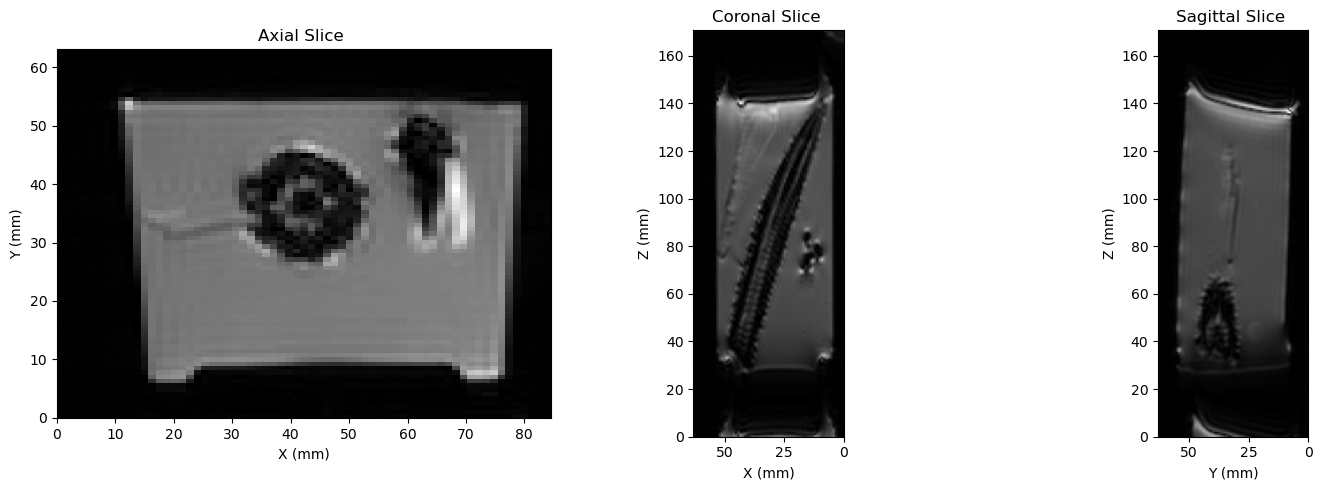

In [85]:
v1_info = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').header
voxel_size = v1_info['pixdim'][1:4]  # Voxel size in mm along each axis (x, y, z)
print(f"Voxel size (mm): {voxel_size}")

# Cropping region (adjust based on your phantom location) Det er her man ændrer på zoom ind og ud
x_range = slice(145, 210)  # Along X-axis (sagittal)
y_range = slice(225, 310)  # Along Y-axis (coronal)
z_range = slice(170, 400)   # Along Z-axis (axial)

# Crop the dataset
cropped_v1 = v1[x_range, y_range, z_range]

# Visualize the cropped dataset slices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Calculate extent for axis labels (in mm)
extent_axial = [0, cropped_v1.shape[0] * voxel_size[0], 0, cropped_v1.shape[1] * voxel_size[1]]  # for axial view
extent_coronal = [0, cropped_v1.shape[1] * voxel_size[1], 0, cropped_v1.shape[2] * voxel_size[2]]  # for coronal view
extent_sagittal = [0, cropped_v1.shape[1] * voxel_size[1], 0, cropped_v1.shape[2] * voxel_size[2]]  # for sagittal view

# Correct slice indices relative to the cropped data
axial_idx = (280 - z_range.start)  # Adjust index based on z-range cropping
coronal_idx1 = (270 - y_range.start)  # Adjust index based on y-range cropping
sagittal_idx = (190 - x_range.start)  # Adjust index based on x-range cropping

# Display Axial slice (mirrored vertically)
axial_slice = cropped_v1[:, :, axial_idx]
axial_slice_mirrored = np.flip(axial_slice, axis=0)  # Mirror the axial slice vertically
axes[0].imshow(axial_slice_mirrored.T, cmap='gray', origin='lower', extent=extent_axial)
axes[0].set_title('Axial Slice ' ) # Vertically Mirrored' #(Z-axis)
axes[0].set_xlabel('X (mm)')
axes[0].set_ylabel('Y (mm)')

# Display Coronal slice
# Display Coronal slice (adjusting aspect ratio)
coronal_slice = cropped_v1[:, coronal_idx1, :]
axes[1].imshow(coronal_slice.T, cmap='gray', origin='lower',extent=extent_coronal)
axes[1].invert_xaxis()  # Flip x-axis for correct orientation
axes[1].set_title('Coronal Slice ') #(Y-axis)
axes[1].set_xlabel('X (mm)')
axes[1].set_ylabel('Z (mm)')


# Display Sagittal slice
sagittal_slice = cropped_v1[sagittal_idx, :, :]
axes[2].imshow(sagittal_slice.T, cmap='gray', origin='lower',extent=extent_sagittal)
axes[2].invert_xaxis()
axes[2].set_title('Sagittal Slice ') #(X-axis)
axes[2].set_xlabel('Y (mm)')
axes[2].set_ylabel('Z (mm)')

plt.tight_layout()
plt.show()

#første foto er spejlvendt, de 2 andre er presset sammen

### TASK 6: Load and display the 4 data sets acquired with different echo times TE and common TR=100ms

- use your cropped phantom coordinates

**useful code for plotting all images stacked horizontally into one image:** 

```
v1=nib.load('yourFile').get_fdata()
i1 = v1[:,:,slc]
...
plt.imshow(np.hstack([i1, i2, i3, i4]), cmap='gray') 
``` 
 

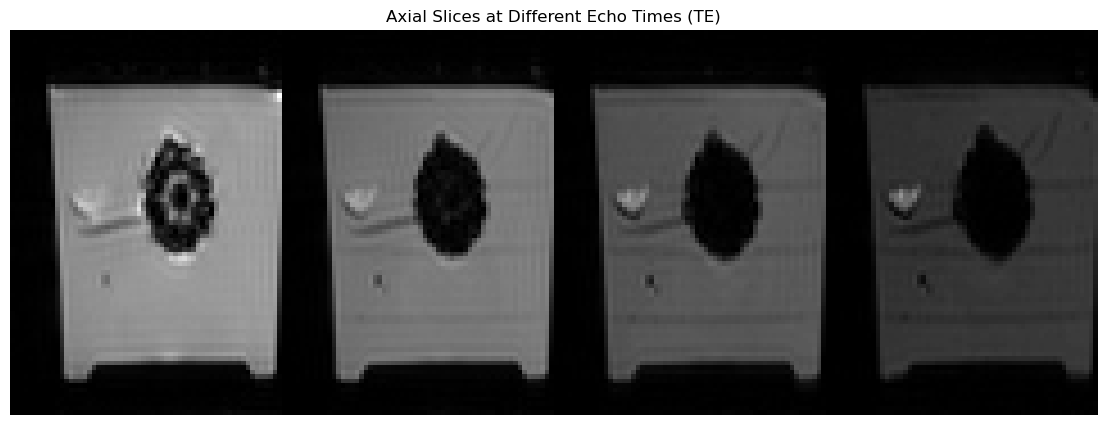

In [86]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Coordinates for the cropped phantom (adjust as per your cropping)
x_start, x_end = 150, 210  # Focus more on the phantom region along X-axis
y_start, y_end = 225, 310  # Focus more on the phantom region along Y-axis
z_slice = 300  # Choose a slice number for axial view

# Load the four NIFTI datasets with different echo times
file1 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz'
file2 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz'
file3 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz'
file4 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz'


# Load data and apply cropping to phantom coordinates
v_1 = nib.load(file1).get_fdata()[x_start:x_end, y_start:y_end, :]
v_2 = nib.load(file2).get_fdata()[x_start:x_end, y_start:y_end, :]
v_3 = nib.load(file3).get_fdata()[x_start:x_end, y_start:y_end, :]
v_4 = nib.load(file4).get_fdata()[x_start:x_end, y_start:y_end, :]

# Select the same axial slice from each dataset, rotate 90 degrees counterclockwise, and flip horizontally
i_1 = np.fliplr(np.rot90(v_1[:, :, z_slice]))
i_2 = np.fliplr(np.rot90(v_2[:, :, z_slice]))
i_3 = np.fliplr(np.rot90(v_3[:, :, z_slice]))
i_4 = np.fliplr(np.rot90(v_4[:, :, z_slice]))

# Stack the images horizontally and plot
plt.figure(figsize=(15, 5))
plt.imshow(np.hstack([i_1, i_2, i_3, i_4]), cmap='gray')
plt.title('Axial Slices at Different Echo Times (TE)')
plt.xlabel('TE 4ms | TE 15ms | TE 30ms | TE 50ms')
plt.axis('off')  # Turn off axis for better visualization
plt.show()

##igen er dette spejvendt 

### TASK 7: Intensity profiles through phantom

**usefule code to plot an e.g. horizontal line** \
`plt.plot([0, 256], [120, 120], 'r--') `

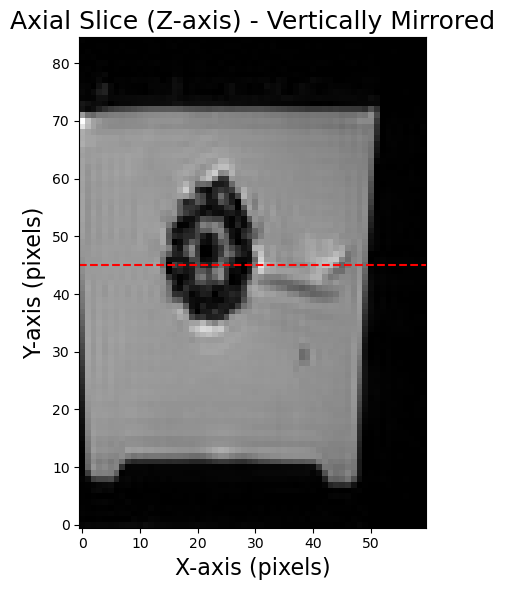

(85, 60)

In [87]:
# Definer positionen for den røde linje
line_position = 45  # Fast sætning af linjens y-værdi til 45

# Ekstraktion af slice for det første billede (TE4ms) og tilføj en rød linje til at vise profilretningen
plt.figure(figsize=(6, 6))

i_1_rot = np.rot90(i_1, 2)
i_2_rot = np.rot90(i_2, 2)
i_3_rot = np.rot90(i_3 ,2)
i_4_rot = np.rot90(i_4, 2)


# Display Axial slice (med lodret spejling)
axial_slice = cropped_v1[:, :, axial_idx]
axial_slice_mirrored = np.flip(axial_slice, axis=0)  # Lodret spejling af axialt snit
plt.imshow(i_1_rot, cmap='gray', origin='lower')
plt.title('Axial Slice (Z-axis) - Vertically Mirrored', fontsize=titel_size)
plt.axhline(y=line_position, color='red', linestyle='--')  # Rød linje ved y=45

# Tilføj akse-navne
plt.xlabel('X-axis (pixels)', fontsize=label_size)
plt.ylabel('Y-axis (pixels)', fontsize=label_size)

plt.tight_layout()
plt.show()


i_1_rot.shape


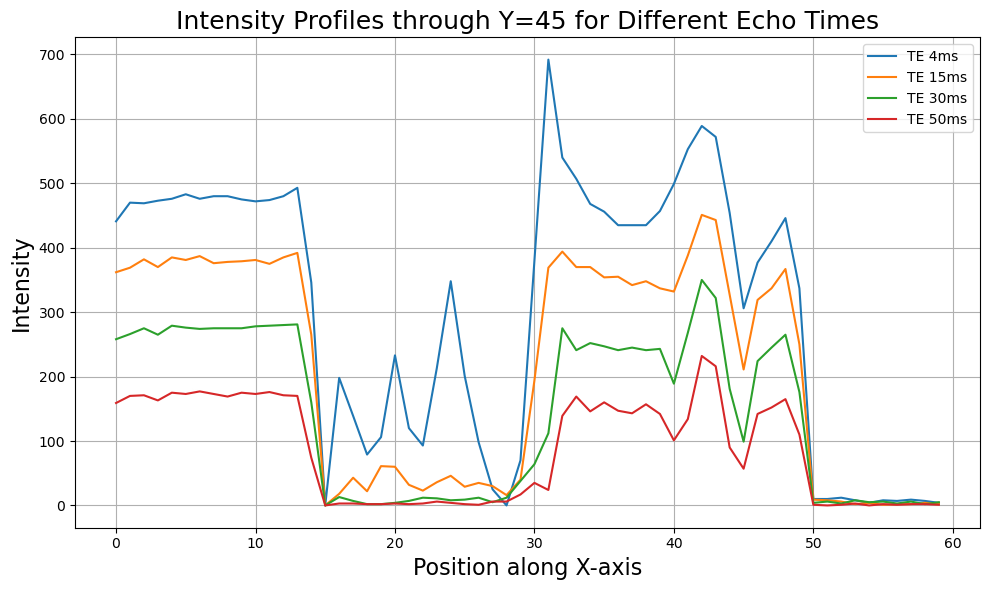

In [88]:
# Vælg en profilretning langs X-aksen ved y=45
profile_y = 45  # Fast position for profilen i Y-aksen

# Ekstraktion af intensitetsprofiler langs X-aksen ved y=45
profile1 = i_1_rot[ profile_y, :]
profile2 = i_2_rot[profile_y , :]
profile3 = i_3_rot[profile_y, :]
profile4 = i_4_rot[ profile_y, :]

# Plot intensitetsprofilerne for hver ekkotid
plt.figure(figsize=(10, 6))
plt.plot(profile1, label='TE 4ms')
plt.plot(profile2, label='TE 15ms')
plt.plot(profile3, label='TE 30ms')
plt.plot(profile4, label='TE 50ms')

plt.title('Intensity Profiles through Y=45 for Different Echo Times', fontsize=titel_size)
plt.xlabel('Position along X-axis', fontsize=label_size)
plt.ylabel('Intensity', fontsize=label_size)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### TASK 8 & 9: Find T2* in gel and phantom

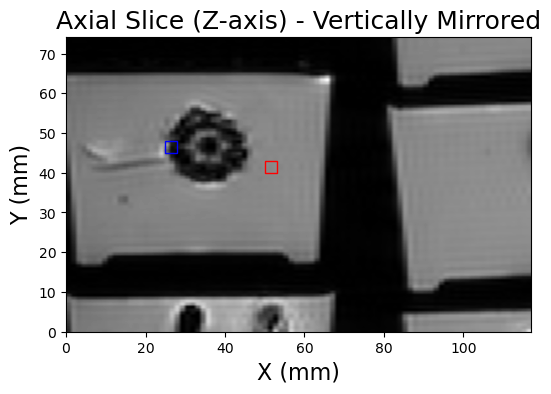

In [89]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Sti til dine datafiler (ændr til din egen sti)
path = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/'

# Indlæsning af data og voxelstørrelse
v1 = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').get_fdata()
v1_info = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').header
voxel_size = v1_info['pixdim'][1:4]  # Voxel size in mm along each axis (x, y, z)

# Definer voxel koordinater for gel og phantom
gel_voxel = (160, 250, 300) #ser på billede fra opg 4 og 5 og lægger 110 til x og 210 til y
phantom_voxel = (135, 255, 300)

# Definer cropping region (justeret til dit phantom område)
x_range = slice(110, 200)
y_range = slice(210, 310)
z_range = slice(150, 400)
cropped_v1 = v1[x_range, y_range, z_range]

# Beregn extent for akse labels (i mm)
extent_axial = [0, cropped_v1.shape[0] * voxel_size[0], 0, cropped_v1.shape[1] * voxel_size[1]]

# Korrektion af slice indekser i forhold til cropped data
axial_idx = gel_voxel[2] - z_range.start

# Funktion til at tilføje firkanter for voxel markeringer
def add_rectangle(ax, xy, width, height, color='red'):
    rect = Rectangle(xy, width, height, linewidth=1, edgecolor=color, facecolor='none')
    ax.add_patch(rect)

# Vis kun aksial skive med markeringer
fig, ax = plt.subplots(figsize=(6, 6))

# Axial skive
axial_slice = cropped_v1[:, :, axial_idx]
axial_slice_mirrored = np.flip(axial_slice, axis=0)  # Spejl aksial skive
ax.imshow(axial_slice_mirrored.T, cmap='gray', origin='lower', extent=extent_axial)
ax.set_title('Axial Slice (Z-axis) - Vertically Mirrored', fontsize=titel_size)
add_rectangle(ax, (gel_voxel[0] - x_range.start, gel_voxel[1] - y_range.start), 3, 3, 'red')  # Gel voxel
add_rectangle(ax, (phantom_voxel[0] - x_range.start, phantom_voxel[1] - y_range.start), 3, 3, 'blue')  # Phantom voxel


# Tilføj akse-navne
plt.xlabel('X (mm)', fontsize=label_size)
plt.ylabel('Y (mm)', fontsize=label_size)

plt.show()


Gel Voxel - T2* = 44.75 ms, S0 = 519.35
Phantom Voxel - T2* = 44.27 ms, S0 = 356.79


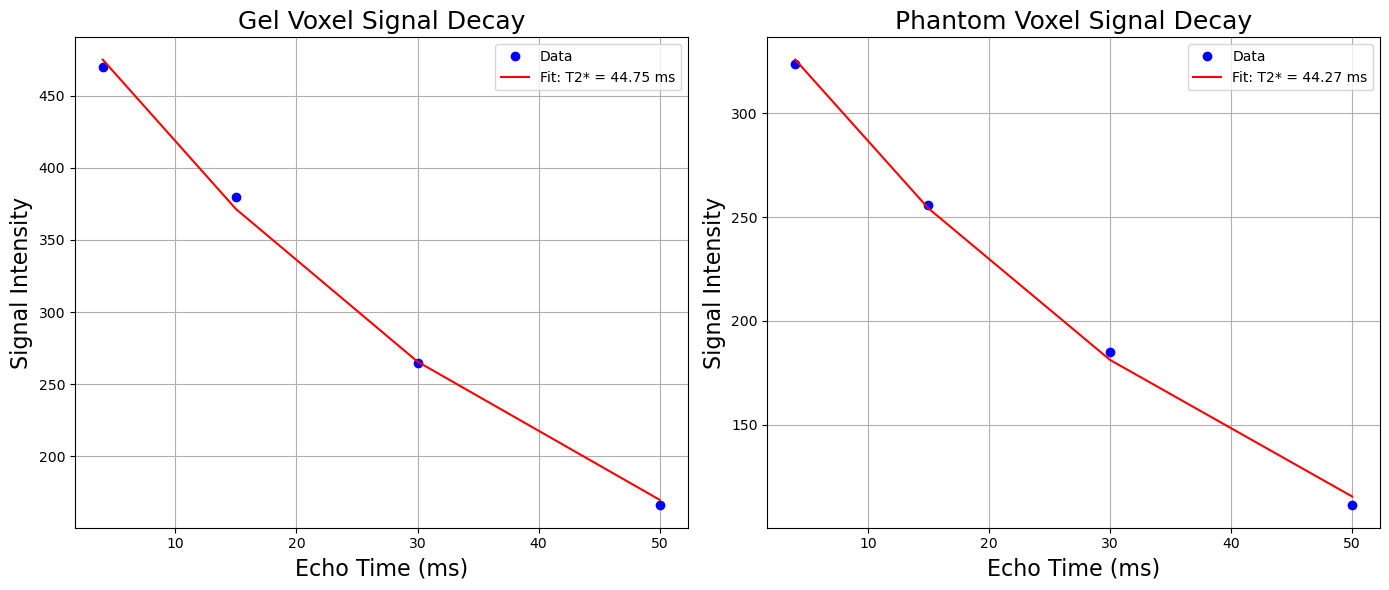

In [90]:
import numpy as np
import nibabel as nib
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt



# Sti til dine datafiler (ændr til din egen sti)
path = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/'

# Echo times (TE) i ms
echo_times = [4, 15, 30, 50]

# Voxelkoordinater
gel_voxel = (160, 250, 300)
phantom_voxel = (135, 255, 300)

# Hent data fra de fire filer og udtræk signalet for hver voxel ved hver echo time
gel_signals = []
phantom_signals = []

for te in echo_times:
    # Indlæs NIfTI-filen med det aktuelle echo time
    filename = f'A_DTU22481_20240910093808_TE{te}ms_TR100ms_FA20.nii.gz'
    data = nib.load(path + filename).get_fdata()
    
    # Tilføj signalintensiteten for hver voxel
    gel_signals.append(data[gel_voxel])
    phantom_signals.append(data[phantom_voxel])

# Konverter til numpy arrays for at lette beregningen
gel_signals = np.array(gel_signals)
phantom_signals = np.array(phantom_signals)

# Definer model-funktionen for signal decay: S(TE) = S0 * exp(-TE / T2*)
def signal_model(te, S0, T2_star):
    return S0 * np.exp(-te / T2_star)

# Funktion til at tilpasse T2* kurven
def fitT2Curve(te, signal):
    popt, _ = curve_fit(signal_model, te, signal, p0=(np.max(signal), 50))  # Justér initialværdi til 50 for T2*
    S0, T2_star = popt
    return T2_star, S0

# Fit T2* for begge voxels
T2_star_gel, S0_gel = fitT2Curve(echo_times, gel_signals)
T2_star_phantom, S0_phantom = fitT2Curve(echo_times, phantom_signals)

# Udskriv resultaterne
print(f'Gel Voxel - T2* = {T2_star_gel:.2f} ms, S0 = {S0_gel:.2f}')
print(f'Phantom Voxel - T2* = {T2_star_phantom:.2f} ms, S0 = {S0_phantom:.2f}')

# Plot data og de tilpassede kurver for begge voxels
plt.figure(figsize=(14, 6))

# Plot for gel voxel
plt.subplot(1, 2, 1)
plt.plot(echo_times, gel_signals, 'o', label='Data', color='blue')
plt.plot(echo_times, signal_model(np.array(echo_times), S0_gel, T2_star_gel), '-', label=f'Fit: T2* = {T2_star_gel:.2f} ms', color='red')
plt.title('Gel Voxel Signal Decay',fontsize=titel_size)
plt.xlabel('Echo Time (ms)', fontsize=label_size)
plt.ylabel('Signal Intensity', fontsize=label_size)
plt.legend()
plt.grid(True)

# Plot for phantom voxel
plt.subplot(1, 2, 2)
plt.plot(echo_times, phantom_signals, 'o', label='Data', color='blue')
plt.plot(echo_times, signal_model(np.array(echo_times), S0_phantom, T2_star_phantom), '-', label=f'Fit: T2* = {T2_star_phantom:.2f} ms', color='red')
plt.title('Phantom Voxel Signal Decay',fontsize=titel_size)
plt.xlabel('Echo Time (ms)', fontsize=label_size)
plt.ylabel('Signal Intensity', fontsize=label_size)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### TASK 10

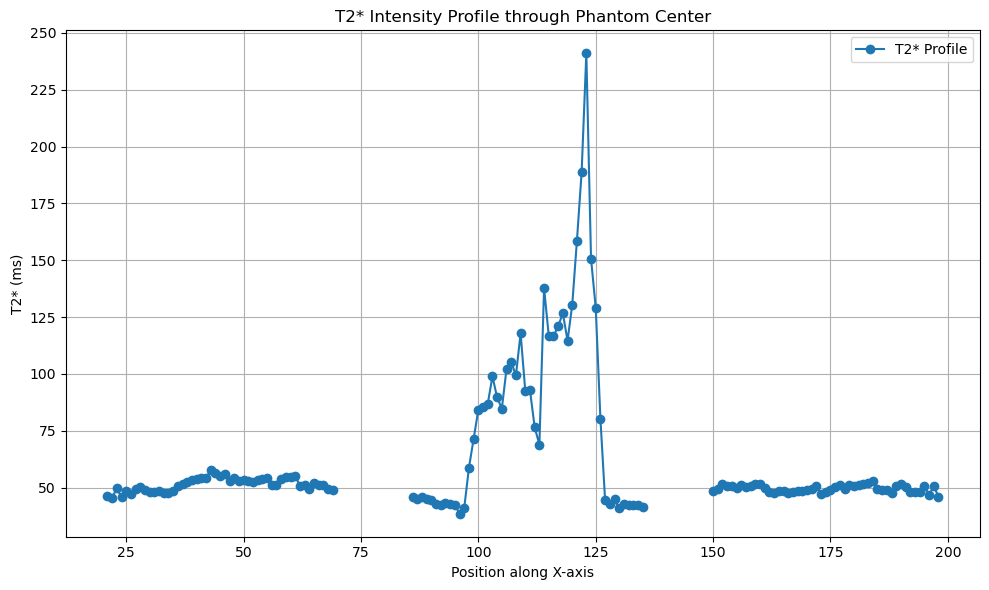

In [91]:
import numpy as np
import nibabel as nib
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the model function for signal decay: S(TE) = S0 * exp(-TE / T2*)
def signal_model(te, S0, T2_star):
    return S0 * np.exp(-te / T2_star)

# Function to fit the T2* curve
def fitT2Curve(te, signal):
    try:
        popt, _ = curve_fit(signal_model, te, signal, p0=(np.max(signal), 30))  # Initial guess
        S0, T2_star = popt
        return T2_star, S0
    except RuntimeError:
        return np.nan, np.nan  # Return NaN if the fit fails

# Load the NIFTI datasets
file1 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz'
file2 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz'
file3 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz'
file4 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz'

# Load the data
v1 = nib.load(file1).get_fdata()
v2 = nib.load(file2).get_fdata()
v3 = nib.load(file3).get_fdata()
v4 = nib.load(file4).get_fdata()

# Define echo times (in ms)
te = np.array([4, 15, 30, 50])

# Choose a line through the center of the phantom (e.g., along the X-axis at the center of the Y-axis)
y_center = v1.shape[1] // 2
z_center = v1.shape[2] // 2
x_range = range(v1.shape[0])  # Full range of X-axis

# Threshold for signal-to-noise ratio (SNR) check
signal_threshold = 50  # Adjust this value based on visual inspection

# Array to store T2* values along the chosen line
T2_star_profile = np.full(len(x_range), np.nan)

# Iterate over the line along the X-axis
for x in x_range:
    # Extract the signal intensities for this voxel across the 4 echo times
    signal = np.array([v1[x, y_center, z_center], 
                       v2[x, y_center, z_center], 
                       v3[x, y_center, z_center], 
                       v4[x, y_center, z_center]])

    # Apply the threshold to filter low-SNR data points
    valid_signal = signal[signal > signal_threshold]

    # Only proceed if at least 2 points have high SNR
    if len(valid_signal) >= 2:
        # Fit the T2* curve and store the result in the profile
        T2_star, _ = fitT2Curve(te, signal)
        T2_star_profile[x] = T2_star  # Store the T2* value
    else:
        # Assign NaN if there are not enough high-SNR points
        T2_star_profile[x] = np.nan

# Plot the T2* profile along the X-axis
plt.figure(figsize=(10, 6))
plt.plot(x_range, T2_star_profile, 'o-', label='T2* Profile')
plt.title('T2* Intensity Profile through Phantom Center')
plt.xlabel('Position along X-axis')
plt.ylabel('T2* (ms)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### TASK 11

/var/folders/s7/j4r3_gbd5clfkbdd78s0040c0000gn/T/ipykernel_93432/1996694375.py:8: RuntimeWarning: overflow encountered in exp
  return S0 * np.exp(-te / T2_star)


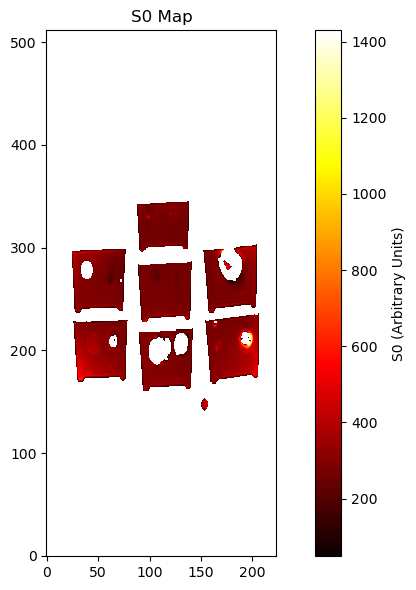

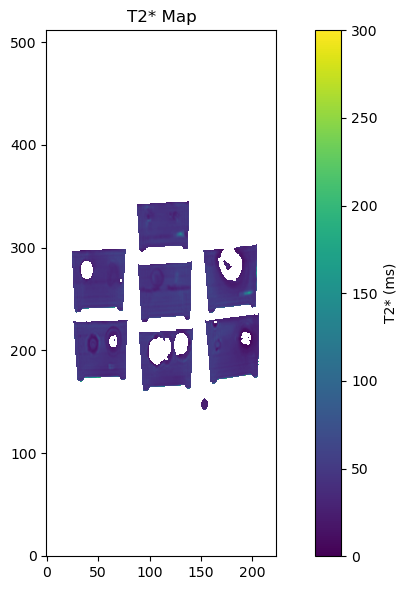

In [92]:
import numpy as np
import nibabel as nib
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the model function for signal decay: S(TE) = S0 * exp(-TE / T2*)
def signal_model(te, S0, T2_star):
    return S0 * np.exp(-te / T2_star)

# Function to fit the T2* curve voxel-wise
def fitT2Curve(te, signal):
    try:
        popt, _ = curve_fit(signal_model, te, signal, p0=(np.max(signal), 30))  # Initial guess
        S0, T2_star = popt
        return T2_star, S0
    except (RuntimeError, ValueError):
        return np.nan, np.nan  # Return NaN if the fit fails

# Load the NIFTI datasets
file1 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz'
file2 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz'
file3 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz'
file4 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz'

# Load the data
v1 = nib.load(file1).get_fdata()
v2 = nib.load(file2).get_fdata()
v3 = nib.load(file3).get_fdata()
v4 = nib.load(file4).get_fdata()

# Define echo times (in ms)
te = np.array([4, 15, 30, 50])

# Choose the slice to calculate S0 and T2* maps (e.g., axial slice)
z_slice = 50  # Adjust this as needed for your phantom

# Get the dimensions of the chosen slice
x_dim, y_dim = v1.shape[0], v1.shape[1]

# Initialize arrays to store S0 and T2* values
S0_map = np.full((x_dim, y_dim), np.nan)
T2_star_map = np.full((x_dim, y_dim), np.nan)

# Threshold for SNR
signal_threshold = 50  # Adjust this based on your data

# Loop through each voxel in the slice
for x in range(x_dim):
    for y in range(y_dim):
        # Extract the signal for this voxel across the 4 echo times
        signal = np.array([v1[x, y, z_slice], v2[x, y, z_slice], v3[x, y, z_slice], v4[x, y, z_slice]])

        # Apply SNR threshold
        valid_signal = signal[signal > signal_threshold]

        # Only proceed if at least 2 data points have high SNR
        if len(valid_signal) >= 2:
            # Fit the T2* curve and store the results
            T2_star, S0 = fitT2Curve(te, signal)
            
            # Set T2* range limit, e.g., [0, 300 ms]
            if 0 < T2_star <= 300:
                T2_star_map[x, y] = T2_star
            S0_map[x, y] = S0  # Store S0 regardless of T2* range

# Rotate the S0 and T2* maps 90 degrees clockwise
S0_map_rotated = np.rot90(S0_map, k=3)
T2_star_map_rotated = np.rot90(T2_star_map, k=3)

# Plot the rotated S0 map
plt.figure(figsize=(8, 6))
plt.imshow(S0_map_rotated, cmap='hot', origin='lower')
plt.colorbar(label='S0 (Arbitrary Units)')
plt.title('S0 Map')
plt.tight_layout()
plt.show()

# Plot the rotated T2* map with a chosen range of [0, 300 ms]
plt.figure(figsize=(8, 6))
plt.imshow(T2_star_map_rotated, cmap='viridis', origin='lower', vmin=0, vmax=300)  # Adjust range as needed
plt.colorbar(label='T2* (ms)')
plt.title('T2* Map')
plt.tight_layout()
plt.show()

